In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from common import Fonts, Data, NWSL, Colors, add_signature

In [2]:
s1 = 2023
s2 = 2024

In [3]:
df1 = Data.get_nwsl_matches(season=str(s1))
df1 = df1[~df1["is_playoffs"]]
t1 = Data.get_nwsl_standings(df1)
t1["position"] = t1.index
t1.index = t1.index - 1
t1

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points,position
0,SD,11,4,7,31,22,9,37,1
1,POR,10,5,7,42,32,10,35,2
2,NC,9,6,7,29,22,7,33,3
3,RGN,9,5,8,29,24,5,32,4
4,LA,8,7,7,31,30,1,31,5
5,GFC,8,7,7,25,24,1,31,6
6,ORL,10,1,11,27,28,-1,31,7
7,WAS,7,9,6,26,29,-3,30,8
8,LOU,6,9,7,25,24,1,27,9
9,HOU,6,8,8,16,18,-2,26,10


In [4]:
df2 = Data.get_nwsl_matches(season=str(s2))
df2 = df2[~df2["is_playoffs"]]
t2 = Data.get_nwsl_standings(df2)
t2["position"] = t2.index
t2.index = t2.index - 1
t2

,team,wins,draws,losses,goals_for,goals_against,goals_diff,points,position
0,ORL,18,6,2,46,20,26,60,1
1,WAS,18,2,6,51,28,23,56,2
2,GFC,17,5,4,41,20,21,56,3
3,KCC,16,7,3,57,31,26,55,4
4,NC,12,3,11,34,28,6,39,5
5,POR,10,4,12,37,35,2,34,6
6,BAY,11,1,14,31,41,-10,34,7
7,CHI,10,2,14,31,38,-7,32,8
8,LOU,7,7,12,33,39,-6,28,9
9,SD,6,7,13,24,35,-11,25,10


In [5]:
def plot(metric, x_min, x_max, title, subtitle, normalize = False):
    # Setup
    plt.rcParams["figure.figsize"] = (14, 10)
    plt.figure(dpi=400)
    fig, ax = plt.subplots()
    fig.patch.set_facecolor(Colors.WHITE)
    ax.set_facecolor(Colors.WHITE)

    t2_sorted = (
        t2.sort_values([metric], ascending=False).reset_index()
    )
    order = t2 if metric == "points" else t2_sorted

    # Plot data
    for y, row in order.iterrows():
        t1_metric = t1[t1["team"] == row["team"]][metric]
        if normalize:
            t1_metric = t1_metric * 26/22
        t2_metric = t2[t2["team"] == row["team"]][metric]
        if len(t1_metric.index) > 0:
            ax.plot(
                [t1_metric, t2_metric],
                [y, y],
                color=Colors.LIGHT_GRAY,
                zorder=1,
                lw=5,
            )
            ax.scatter(
                [t1_metric],
                [y],
                edgecolor=NWSL.color(row["team"]),
                lw=5,
                color=Colors.WHITE,
                s=500,
            )
        ax.scatter([t2_metric], [y], color=NWSL.color(row["team"]), lw=5, s=500)

    # Axes
    ax.set_xlim([x_min, x_max + 0.5])
    ax.set_xticks(range(x_min, x_max + 1, 5))
    ax.set_xticklabels(
        range(x_min, x_max + 1, 5),
        fontproperties=Fonts.BARLOW,
        size=16,
        color=Colors.BLACK,
    )
    ax.set_ylim([13.5, -0.5])
    ax.set_yticks(range(0, 14))
    ax.set_yticklabels(
        order["team"].apply(lambda x: NWSL.name(x)),
        fontproperties=Fonts.BARLOW,
        size=16,
        color=Colors.BLACK,
    )
    ax.xaxis.grid(True, color=Colors.LIGHT_GRAY, linestyle="--")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)

    # Legend
    offset = (x_max - x_min) / 20
    ax.plot(
        [x_max + offset, x_max + offset],
        [0, 1],
        color=Colors.LIGHT_GRAY,
        zorder=1,
        clip_on=False,
        lw=5,
    )
    ax.scatter(
        [x_max + offset],
        [1],
        edgecolor=Colors.LIGHT_GRAY,
        lw=5,
        color=Colors.WHITE,
        s=500,
        clip_on=False,
    )
    ax.scatter(
        [x_max + offset], [0], color=Colors.LIGHT_GRAY, lw=5, s=500, clip_on=False
    )
    ax.text(
        x_max + offset * 1.5,
        1,
        str(s1),
        fontproperties=Fonts.BARLOW,
        size=16,
        ha="left",
        va="center",
    )
    ax.text(
        x_max + offset * 1.5,
        0,
        str(s2),
        fontproperties=Fonts.BARLOW,
        size=16,
        ha="left",
        va="center",
    )

    # Title
    ax.set_title(
        title,
        fontproperties=Fonts.BARLOW_BOLD,
        size=36,
        ha="left",
        x=0,
        y=1.1,
    )

    # Subtitle
    ax.text(
        x_min,
        -1,
        subtitle,
        fontproperties=Fonts.BARLOW,
        size=20,
        ha="left",
    )

    add_signature(fig, x=0.81, y=0.04, fs=14, w=0.025)

    plt.savefig(
        "images/" + metric + "_" + str(s2) + ("_normalized" if normalize else "") + ".png",
        bbox_inches="tight",
        transparent=False,
        pad_inches=0.5,
        dpi=200,
    )

<Figure size 5600x4000 with 0 Axes>

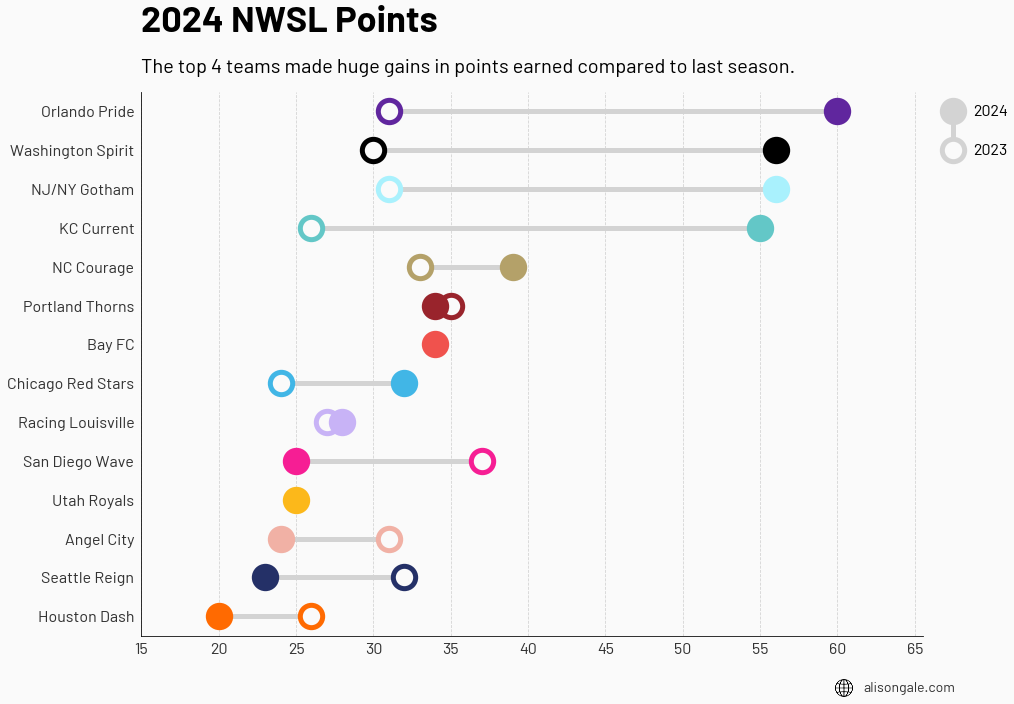

In [11]:
plot(
    "points",
    15,
    65,
    "2024 NWSL Points",
    "The top 4 teams made huge gains in points earned compared to last season.",
)

<Figure size 5600x4000 with 0 Axes>

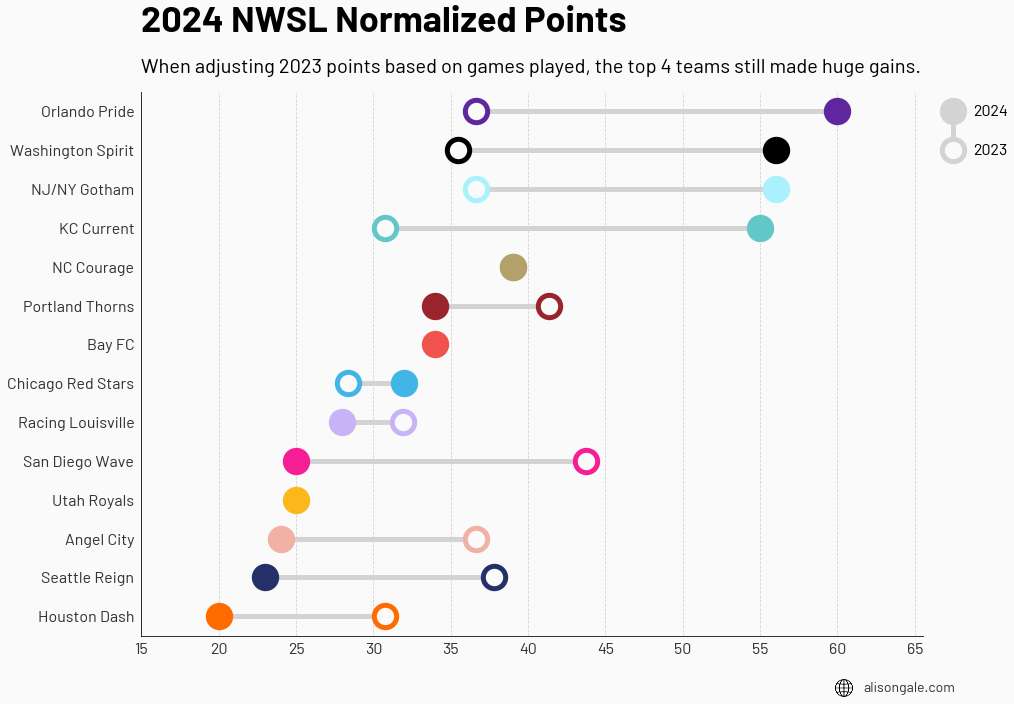

In [7]:
plot(
    "points",
    15,
    65,
    "2024 NWSL Normalized Points",
    "When adjusting 2023 points based on games played, the top 4 teams still made huge gains.",
    True
)

<Figure size 5600x4000 with 0 Axes>

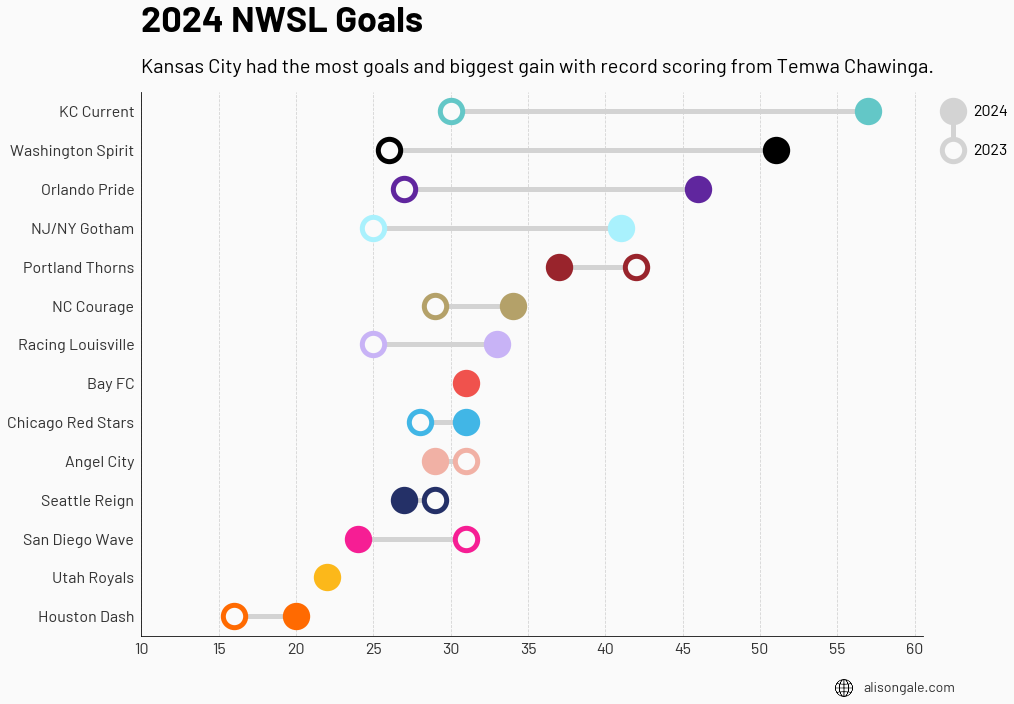

In [8]:
plot(
    "goals_for",
    10,
    60,
    "2024 NWSL Goals",
    "Kansas City had the most goals and biggest gain with record scoring from Temwa Chawinga.",
)

<Figure size 5600x4000 with 0 Axes>

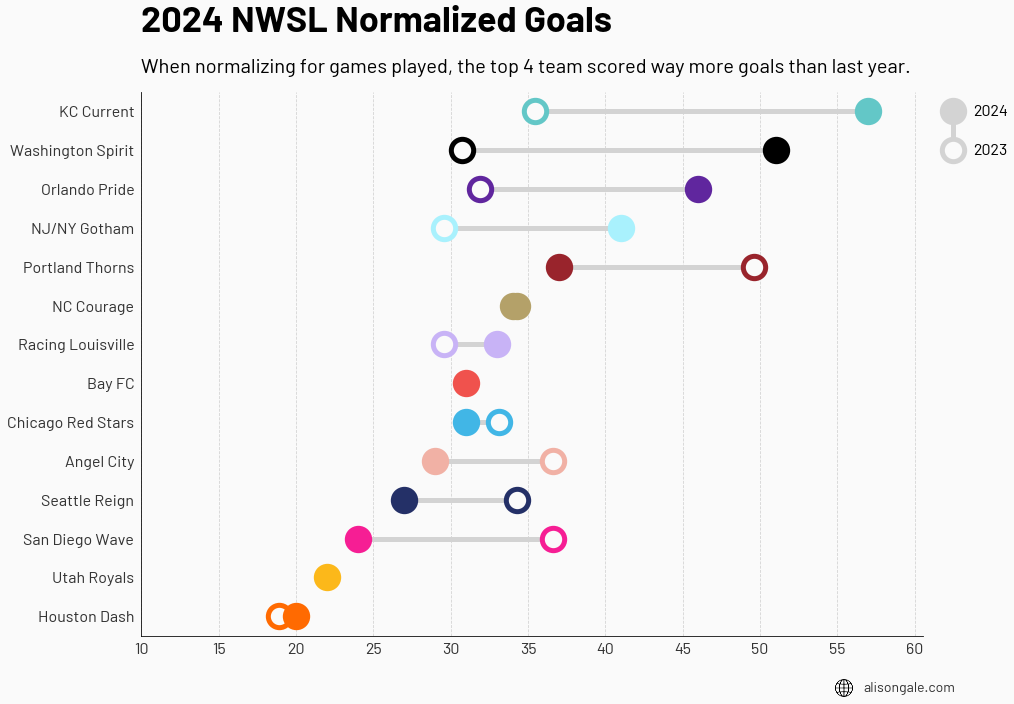

In [9]:
plot(
    "goals_for",
    10,
    60,
    "2024 NWSL Normalized Goals",
    "When normalizing for games played, the top 4 team scored way more goals than last year.",
    True
)

<Figure size 5600x4000 with 0 Axes>

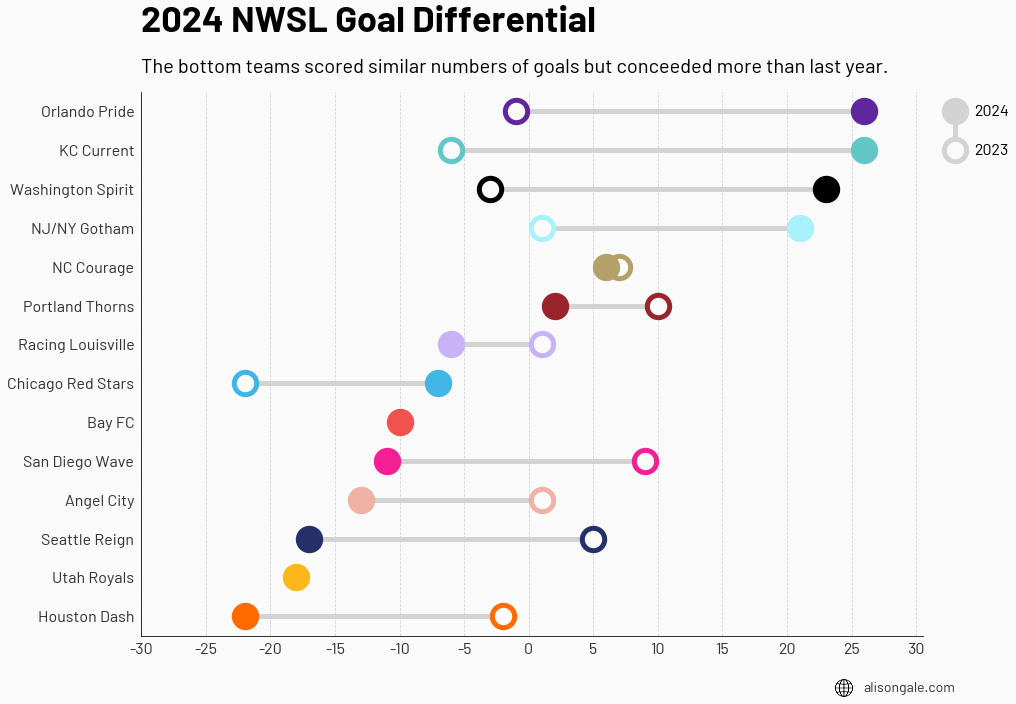

In [10]:
plot(
    "goals_diff",
    -30,
    30,
    "2024 NWSL Goal Differential",
    "The bottom teams scored similar numbers of goals but conceeded more than last year.",
)